In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('weatherHistory.csv')
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [3]:
data['Formatted Date']=pd.to_datetime(data['Formatted Date'])
# calculate day of year 
data['Date']=data['Formatted Date'].map(lambda date: date.year*10000 + date.month*100 + date.day)
data['DayOfYear']=data['Formatted Date'].map(lambda date: (date.month-1)*30 + date.day)
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,DayOfYear
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,20060401,91
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,20060401,91
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,20060401,91
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,20060401,91
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,20060401,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,20160909,249
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,20160909,249
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,20160909,249
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,20160909,249


In [4]:
# Calculate mean temperature of each day in 24 hours
MeanTempEachDay = data.groupby(['Date','DayOfYear'])['Temperature (C)'].sum().reset_index()
MeanTempEachDay['Temperature (C)'] = MeanTempEachDay['Temperature (C)'] // 24
MeanTempEachDay

,Date,DayOfYear,Temperature (C)
0,20060101,1,3.0
1,20060102,2,5.0
2,20060103,3,2.0
3,20060104,4,2.0
4,20060105,5,2.0
...,...,...,...
4013,20161227,357,0.0
4014,20161228,358,0.0
4015,20161229,359,0.0
4016,20161230,360,0.0


Text(0, 0.5, 'Temperature (C)')

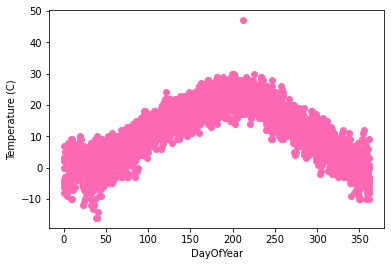

In [5]:
plt.scatter(MeanTempEachDay['DayOfYear'],MeanTempEachDay['Temperature (C)'] , c = 'hotpink')
plt.xlabel('DayOfYear')
plt.ylabel('Temperature (C)')

In [6]:
X = MeanTempEachDay['DayOfYear'].values
Y= MeanTempEachDay['Temperature (C)'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [7]:
X_train, X_test , Y_train , Y_test = train_test_split(X ,Y ,shuffle=True)

class Perceptron:
    def __init__(self):
        pass

    def fit(self,X_train,Y_train):
        # init params
        self.w = np.matmul(inv(np.matmul(X_train.T,X_train)), np.matmul(X_train.T,Y_train))
        w = np.random.rand(1,1)
        b = np.random.rand(1,1)

        #hyper parameters
        lr_w = 0.000001
        lr_b = 0.1
        epochs = 2

        Errors = []
        Errors_test = []

        fig ,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))

        # train
        w_list = []
        b_list = []
        for epoch in range(epochs):
            for i in range(X_train.shape[0]):
                x = X_train[i]
                y = Y_train[i]

                y_pred = x * w + b
                e = y - y_pred

                # update
                w += lr_w * e * x
                b += lr_b * e
                w_list.append(w)
                b_list.append(b)

                Y_pred = X_train * w + b
                Errors.append(np.mean(Y_train - Y_pred) ** 2)

                ax2.clear()
                ax2.plot(Errors)

                Y_pred_test = X_test * w + b 
                Errors_test.append(np.mean(Y_test - Y_pred_test) ** 2)

                ax3.clear()
                ax3.plot(Errors_test)

            ax1.clear()
            ax1.scatter(X_train,Y_train, c ='hotpink')
            ax1.plot(X_train,Y_pred, c='green')

        plt.show()
        return w_list,b_list
        
    def predict(self, X_test):
        y_pred= np.matmul(X_test,self.w)
        return y_pred                     
    
    def evaluate(self , X , Y , loss="MAE"):
        Y_pred = []
        for i in range(X.shape[0]):
            y_pred = self.predict(X[i])
            Y_pred.append(y_pred)
            
        Y_pred = np.array(Y_pred)
        Error = Y - Y_pred
        
        if loss == "MAE":
            return np.mean(np.abs(Error))
        elif loss == "MSE":
            return np.mean(Error**2)

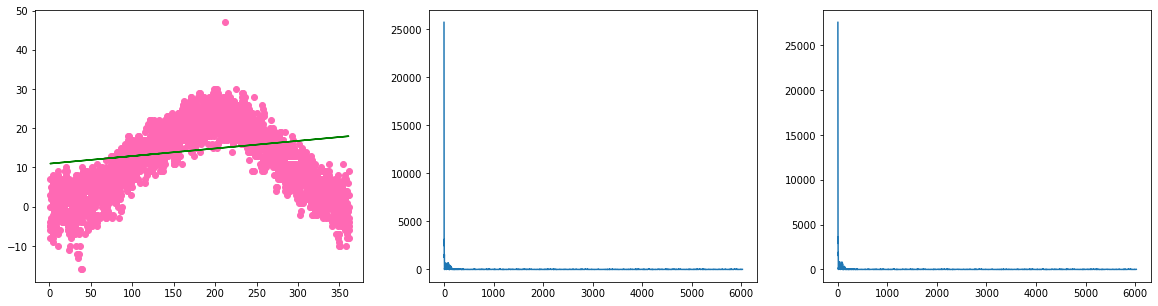

In [8]:
Pct=Perceptron()
w_list,b_list = Pct.fit(X_train,Y_train)

In [9]:
y_pred = Pct.predict(X_test)

In [12]:
MAE = Pct.evaluate(X_test, Y_test,'MAE')
MSE = Pct.evaluate(X_test, Y_test,'MSE')

print('MAE = ',MAE)
print('MSE = ' ,MSE)

MAE =  8.364782672932325
MSE =  99.20804808002524


In [23]:
np.save('data.npy',w_list,b_list) 

In [29]:
open_data = np.load('data.npy')
open_data

array([[[0.01937285]],

       [[0.01937285]],

       [[0.01937285]],

       ...,

       [[0.01937285]],

       [[0.01937285]],

       [[0.01937285]]])